## Intern Name-Ajoe P Johnson

## The Sparks Foundation Oct2021

## GRIP Task 6: Decision Tree Algorithm

## Importing all the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
df.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df = df.drop(columns='Id',axis=1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot:xlabel='variable', ylabel='value'>

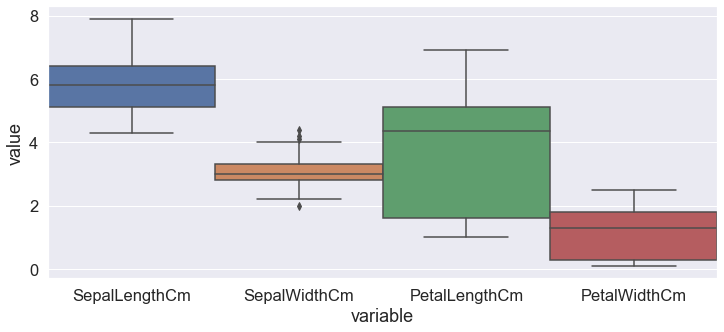

In [15]:
data_con=df.select_dtypes(include=[np.number])
plt.figure(figsize=[12,5])
sns.set(font_scale=1.5)
sns.boxplot(x='variable', y='value', data=pd.melt(data_con), width=1)

<AxesSubplot:ylabel='SepalWidthCm'>

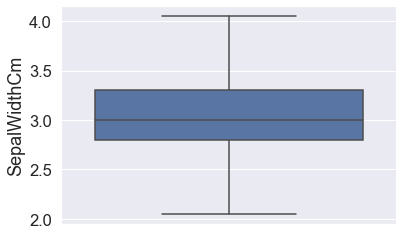

In [17]:
# To remove outliers from 'sepal width (cm)'
q1=df['SepalWidthCm'].quantile(0.25)
q3=df['SepalWidthCm'].quantile(0.75)
iqr=q3-q1
lower_limit=q1-1.5*(iqr)
upper_limit=q3+1.5*(iqr)

df=df[(df['SepalWidthCm'] >= q1-1.5*iqr) & (df['SepalWidthCm'] <= q3+1.5*iqr)]

sns.boxplot(y=df['SepalWidthCm'])


In [19]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df['Species']=df['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df['Species'].unique()

array([0, 1, 2], dtype=int64)

In [21]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
x = df.iloc[:, [0, 1, 2, 3]].values
y = df.iloc[:, -1]
x.shape, y.shape

((150, 4), (150,))

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [27]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X, y, train_size = 0.80, stratify = y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [28]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC( class_weight = 'balanced')
classifier = DTC()

In [36]:
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
y_pred

array([2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 1, 0, 1,
       0, 2, 0, 1, 2, 1, 2, 0], dtype=int64)

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)*100


96.66666666666667

Text(0.5, 1.0, 'Decision Tree Diagram')

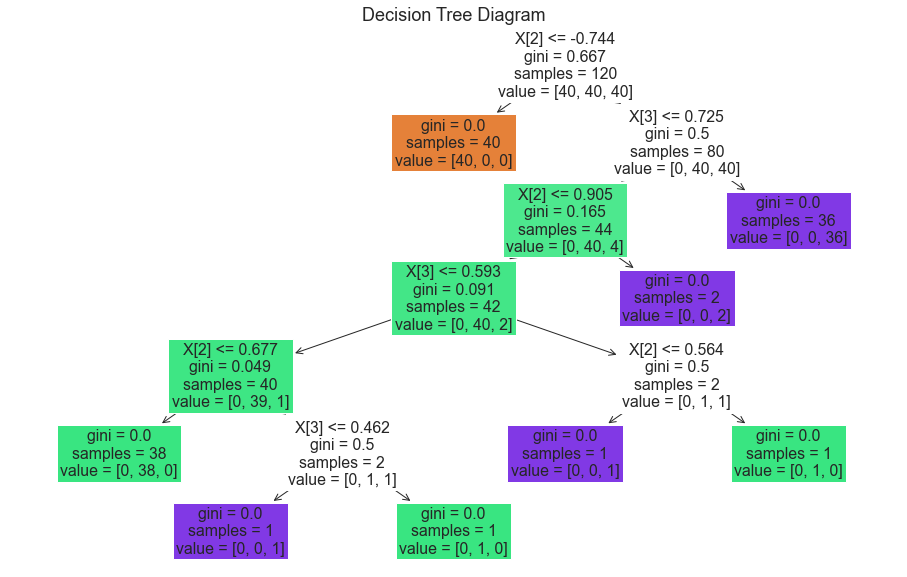

In [40]:
from sklearn import tree
plt.figure(figsize=(16,10))
tree.plot_tree(classifier,filled=True)
plt.title("Decision Tree Diagram")
